In [1]:
from matplotlib import pyplot as plt
import numpy as np
import torch
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import os
import matplotlib.ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import json
from matplotlib import colormaps
from collections.abc import Iterable

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as ticker
from bo_methods_lib.bo_methods_lib.GPBO_Classes_New import Data, Method_name_enum
from bo_methods_lib.bo_methods_lib.analyze_data import analyze_sse_min_sse_ei, analyze_thetas, get_best_data, get_median_data, get_mean_data, analyze_heat_maps

import warnings
np.warnings = warnings

/afs/crc.nd.edu/user/m/mcarlozo/.conda/envs/Toy_Problem_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(7, 7) (3, 3)


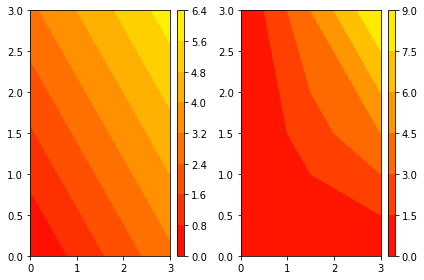

In [12]:
#Create Subplot
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

xx,yy = np.meshgrid(np.linspace(0, 3, 3), np.linspace(0, 3, 3))
zs = [xx+yy, xx*yy, xx-yy]

print(z.shape, xx.shape)

fig, (ax1, ax2) = plt.subplots(ncols=2)


img1 = ax1.contourf(xx, yy, zs[0], cmap = plt.cm.get_cmap("autumn"))
# img1 = ax1.imshow(zs[0])
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes("right", size="5%", pad="5%")
fig.colorbar(img1, cax=cax1)

img2 = ax2.contourf(xx, yy, zs[1], cmap = plt.cm.get_cmap("autumn"))
divider = make_axes_locatable(ax2)
cax2 = divider.append_axes("right", size="5%", pad="5%")
fig.colorbar(img2, cax=cax2)

plt.tight_layout()

(7, 7) (7, 7)


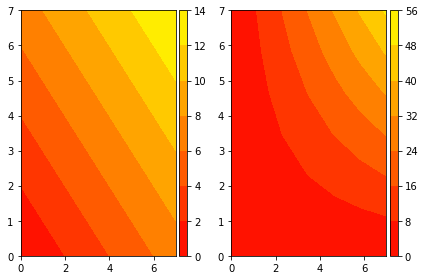

In [6]:
#Create Subplot
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

xx,yy = np.meshgrid(np.linspace(0, 7, 7), np.linspace(0, 7, 7))
zs = [xx+yy, xx*yy, 2*xx+yy, xx-yy]

print(z.shape, xx.shape)

fig, axes = plt.subplots(ncols=2)

for i, ax in enumerate(axes):
    img1 = ax.contourf(xx, yy, zs[i], cmap = plt.cm.get_cmap("autumn"))
#     img1 = ax.imshow(data[:,:,i])
    divider = make_axes_locatable(ax)
    cax1 = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(img1, cax=cax1)

# img2 = ax2.imshow(-data)
# divider = make_axes_locatable(ax2)
# cax2 = divider.append_axes("right", size="5%", pad=0.05)
# fig.colorbar(img2, cax=cax2)

plt.tight_layout(h_pad=1)

In [2]:
def create_subplots(num_subplots, sharex = "row", sharey = 'none'):
    """
    Creates Subplots based on the amount of data
    
    Parameters
    ----------
    num_subplots: int, total number of needed subplots
    
    Returns
    -------
    fig: matplotlib.figure, The figure you are plotting
    ax: matplotlib.axes.Axes, 1D array of axes
    len(ax): The number of axes generated total
    """

    assert num_subplots >= 1, "Number of subplots must be at least 1"
    assert isinstance(num_subplots, int), "Num subplots must be int"
    #Make figures and define number of subplots  
    #If you are making more than one figure, sharex is always true
    if num_subplots == 1:
        sharex = True

    #Make enough rows and columns and get close to equal number of each
    row_num = int(np.floor(np.sqrt(num_subplots)))
    col_num = int(np.ceil(num_subplots/row_num))
    assert row_num * col_num >= num_subplots, "row * col numbers must be at least equal to number of graphs"
    total_ax_num = row_num * col_num

    #Creat subplots
    gridspec_kw = {'wspace': 0.4, 'hspace': 0.2}
    fig, axes = plt.subplots(row_num, col_num, figsize = (col_num*6,row_num*6), squeeze = False, sharex = sharex, sharey = sharey)

    #Turn off unused axes
    for i, axs in enumerate(axes.flatten()):
        if i >= num_subplots:
            axs.axis('off')

    #Make plot mapping to map an axes to an iterable value
    plot_mapping = {}
    for i in range(row_num):
        for j in range(col_num):
            plot_number = i * col_num + j
            plot_mapping[plot_number] = (i, j)

    return fig, axes, total_ax_num, plot_mapping

def set_plot_titles(fig, title, x_label, y_label, title_fontsize = 24, other_fontsize = 20):
    """
    Helper function to set plot titles and labels for figures with subplots
    """
    
    if title_fontsize is not None:
        fig.suptitle(title, weight='bold', fontsize=title_fontsize)
    if x_label is not None:
        fig.supxlabel(x_label, fontsize=other_fontsize,fontweight='bold')
    if y_label is not None:
        fig.supylabel(y_label, fontsize=other_fontsize,fontweight='bold')
        
    return  

0.0 14.0
0.0 49.0
0.0 21.0
-7.0 7.0


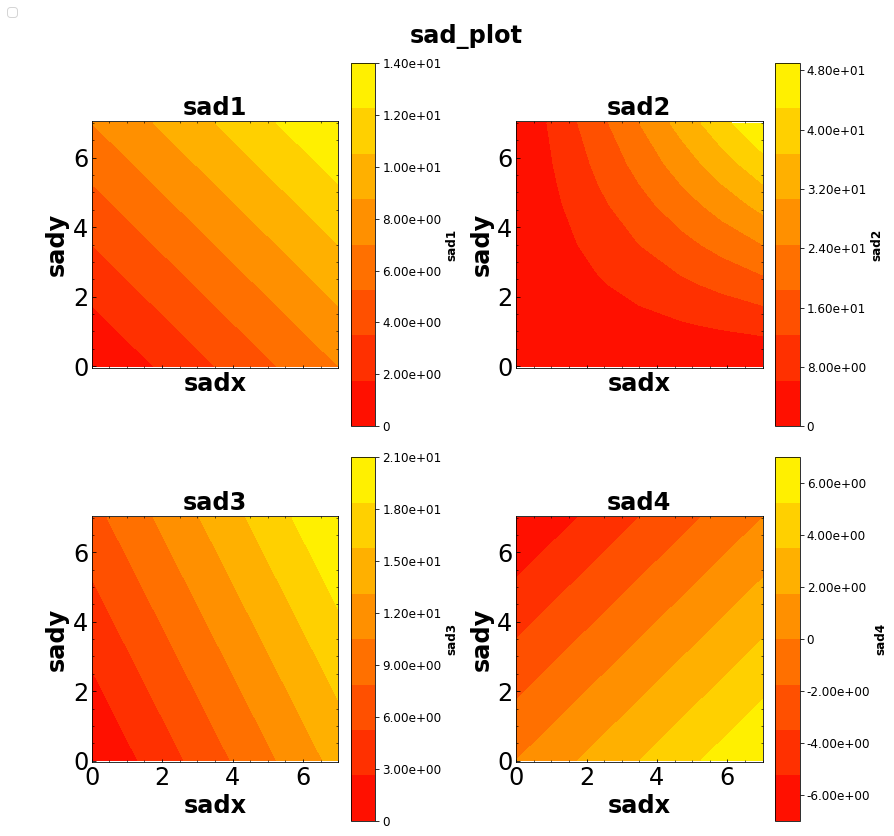

In [4]:
fig, axes, total_ax_num, plot_mapping = create_subplots(4, sharex = True)
fontsize = 24
other_fontsize = 12

xx,yy = np.meshgrid(np.linspace(0, 7, 7), np.linspace(0, 7, 7))
zs = [xx+yy, xx*yy, 2*xx+yy, xx-yy]
z_title = ["sad1", "sad2", "sad3", "sad4"]
levels = [10,10,10,10]

log_data = False
zbins = 9

for i, ax in enumerate(axes.flatten()):
    if i< 4:
        need_unscale = False
        z = zs[i]

        #Unlog scale the data if vmin is 0 and log_data = True
        if np.min(z) == -np.inf or np.isnan(np.min(z)):
            warnings.warn("Cannot plot log scaled data! Reverting to original")
            need_unscale = True 
            if log_data:
                z = np.exp(all_z_data[i])

        #Create normalization
        vmin = np.nanmin(z)
        vmax = np.nanmax(z)

        print(vmin,vmax)

        if need_unscale == False and log_data:
            title2 = "log(" + z_title[i] + ")"
        else:
            title2 = z_title[i]

        if not log_data and vmin > 0:
            norm = colors.LogNorm(vmin=vmin, vmax=vmax, clip=False)
            cbar_ticks = np.logspace(np.log10(vmin), np.log10(vmax), zbins)
        #             new_ticks = np.logspace(np.log10(vmin), np.log10(vmax), 7)
            new_ticks = matplotlib.ticker.LogLocator() #Set up to 12 ticks
            def custom_format(x, pos):
                return f'{eval("10**" + str(int(np.log10(x))))}' if x != 0 else '0'
        else:
            norm = colors.Normalize(vmin=vmin, vmax=vmax, clip=False) 
            cbar_ticks = np.linspace(vmin, vmax, zbins)
            new_ticks = matplotlib.ticker.MaxNLocator(nbins=7) #Set up to 12 ticks  
            def custom_format(x, pos):
                return '{:2.2e}'.format(x) if x != 0 else '0'

        cs_fig = ax.contourf(xx, yy, zs[i], levels = cbar_ticks, cmap = plt.cm.get_cmap("autumn"), norm = norm)
#         img1 = ax.imshow(all_z_data[:,:,i])
        
         #Set title, label, and axes
        ax.set_title(z_title[i], fontsize=fontsize, fontweight='bold')   
        ax.set_xlabel("sadx",fontsize=fontsize,fontweight='bold')
        ax.set_ylabel("sady",fontsize=fontsize,fontweight='bold')

        #Turn on tick parameters and bin number
        ax.xaxis.set_tick_params(labelsize=fontsize, direction = "in")
        ax.yaxis.set_tick_params(labelsize=fontsize, direction = "in")
        ax.locator_params(axis='y', nbins=5)
        ax.locator_params(axis='x', nbins=5)
        ax.minorticks_on() # turn on minor ticks
        ax.tick_params(which="minor",direction="in",top=True, right=True)

        #Set bounds and aspect ratio       
        ax.set_xlim(left = np.min(xx), right = np.max(xx))
        ax.set_box_aspect(1)

        if yy is not None and np.min(yy) == 0:
            ax.set_ylim(bottom = np.min(yy)-0.05, top = np.max(yy)+0.05)
            
        if not log_data and vmin >0:
            fmt = matplotlib.ticker.FuncFormatter(custom_format)
        else:
            fmt = matplotlib.ticker.FuncFormatter(custom_format)
            
        divider = make_axes_locatable(ax)
        cax1 = divider.append_axes("right", size="10%", pad="5%")
#         cbar = fig.colorbar(cs_fig, cax=cax1)
        
        cbar = fig.colorbar(cs_fig, ax = ax, cax = cax1, ticks = new_ticks, use_gridspec=True) #format = fmt
        cbar.ax.yaxis.set_major_formatter(fmt)
        cbar.ax.tick_params(labelsize=other_fontsize)
        cbar.ax.set_ylabel(title2, fontsize=other_fontsize, fontweight='bold')
        
#Get legend information and make colorbar on last plot
handles, labels = axes[0,0].get_legend_handles_labels() 

#Print the title and labels as appropriate

for axs in axes[-1]:
    axs.set_xlabel("sadx", fontsize = 24)

for axs in axes[:, 0]:
    axs.set_ylabel("sady", fontsize = 24)

set_plot_titles(fig, "sad_plot", None, None, title_fontsize = 24, other_fontsize = 24)

#Plots legend and title
fig.legend(handles, labels, loc= "upper right", fontsize = other_fontsize, bbox_to_anchor=(-0.02, 1), borderaxespad=0)

plt.tight_layout(h_pad=1)